In [59]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

In [61]:
#Download data for csv from https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
#Unzip file and save the covtype.data as covtype.csv
#Placing file into gitignore since it is a large one
covtype = pd.read_csv('covtype.csv',delimiter=',',dtype='float32').values

In [8]:
#First 54 columns are features and last column is the label
covtype.shape

(581011, 55)

In [9]:
covtype_features,covtype_labels = covtype[:,:54],covtype[:,54]

In [13]:
#Subtract 1 each from the covtype_labels to make them into 0 index data (i.e. from 1 to 10 transformed to 0 to 9)
covtype_labels -= 1

In [17]:
np.random.seed(0) #Start shuffle seed
train_features,test_features,train_labels,test_labels = train_test_split(covtype_features,covtype_labels,test_size=0.2)
validation_features,test_features,validation_labels,test_labels = train_test_split(test_features,test_labels,test_size=0.5)

In [23]:
#Confirmation of split of data between Train, Validation and Test
totaldata= train_features.shape[0]+validation_features.shape[0]+test_features.shape[0]
datasetsplit = (train_features.shape[0]/totaldata,validation_features.shape[0]/totaldata,test_features.shape[0]/totaldata)
datasetsplit

(0.7999986230897522, 0.09999982788621903, 0.1000015490240288)

In [24]:
# assign label names and count label frequencies
label_map = {0:'Spruce/Fir', 1:'Lodgepole Pine', 2:'Ponderosa Pine', 3:'Cottonwood/Willow', 
             4:'Aspen', 5:'Douglas-fir', 6:'Krummholz'}

<AxesSubplot:title={'center':'Label Counts'}>

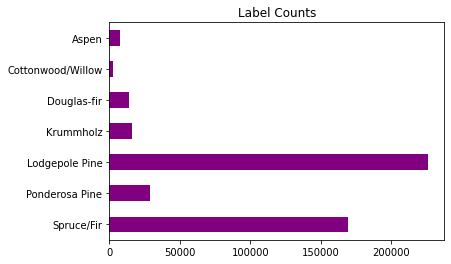

In [35]:
label_counts = pd.DataFrame(data=train_labels)[0].map(label_map).value_counts(sort=False).sort_index(ascending=False)
label_counts.plot(kind='barh', color='purple', title='Label Counts')

In [54]:
#Train the model using 'One vs rest' classifier
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(train_features, train_labels)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [55]:
# Test on a random test row. In this example the 300th row was chosen
print('Predicted value is : {}'.format(lm.predict([test_features[300,:]])[0]))
print('Actual value is : {}'.format(test_labels[300]))

Predicted value is : 2.0
Actual value is : 2.0


In [57]:
#Calculate percentage of accurate predictions
accuracy = lm.score(test_features,test_labels)
print("Accuracy is : {} %".format(accuracy*100))

Accuracy is : 71.52249492272212 %


In [60]:
print(metrics.classification_report(test_labels, lm.predict(test_features)))

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     21076
         1.0       0.74      0.80      0.77     28459
         2.0       0.61      0.87      0.72      3523
         3.0       0.69      0.30      0.42       286
         4.0       0.00      0.00      0.00       952
         5.0       0.44      0.05      0.09      1732
         6.0       0.72      0.50      0.59      2074

    accuracy                           0.72     58102
   macro avg       0.56      0.46      0.47     58102
weighted avg       0.70      0.72      0.70     58102



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
